# Visualizing statistical relationships


* Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

* We will discuss three seaborn functions in this tutorial. The one we will use most is `relplot()`. This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. `relplot()` combines a `FacetGrid` with one of two axes-level functions. 

* `scatterplot()` with `kind = "scatter"` the default

* `lineplot()` with `kind = "line"`. 

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
### Set the style: 
sns.set(style = "darkgrid")

## Relating variables with scatter plots: 

* The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

* There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the `scatterplot()` function. In the categorical visualization tutorial, we will see specialized tools for using scatterplots to visualize categorical data. The `scatterplot()` is the default kind in `relplot()` (it can also be forced by setting `kind="scatter"`):

In [7]:
tips = pd.DataFrame(data = sns.load_dataset("tips"))
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


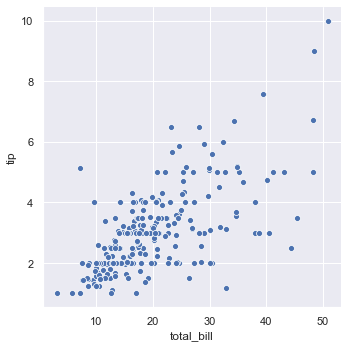

In [8]:
sns.relplot(x = "total_bill", y = "tip", data = tips);
pass

* While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a `“hue semantic”`, because the color of the point gains meaning:

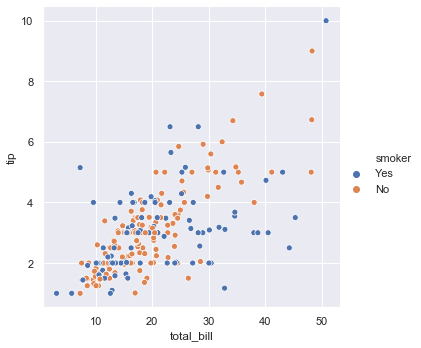

In [9]:
sns.relplot(x = "total_bill", y = "tip", data = tips,
           hue = "smoker");
pass

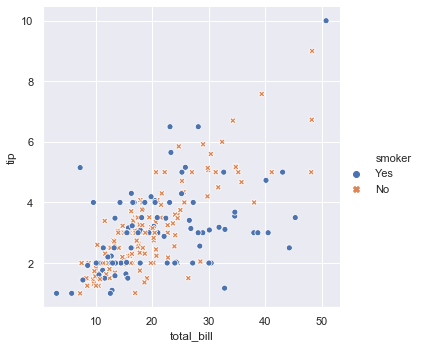

In [10]:
sns.relplot(x = "total_bill", y = "tip", data = tips,
           hue = "smoker", 
           style = "smoker");
pass

* It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

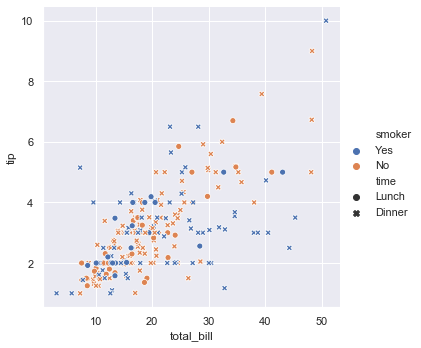

In [11]:
sns.relplot(x="total_bill", y="tip", hue="smoker", 
            style="time", data=tips);

* In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

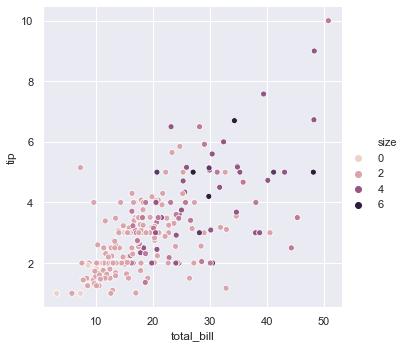

In [12]:
sns.relplot(x="total_bill", 
            y="tip", hue="size", data=tips);
pass

## Emphasizing continuity with line plots 

In [15]:
data = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
data.head()

,time,value
0,0,-0.156431
1,1,0.470108
2,2,-0.760653
3,3,-2.309354
4,4,-1.826690


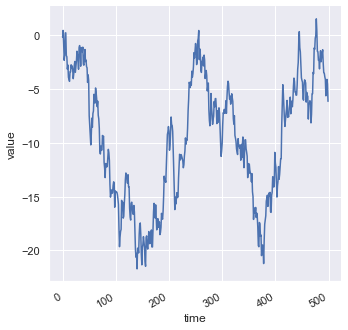

In [19]:
plot_g = sns.relplot(x = "time", y = "value", 
                    data = data, kind = "line")
plot_g.fig.autofmt_xdate()

## Plotting with semantic mappings

In [20]:
fmri = pd.DataFrame(data = sns.load_dataset("fmri"))

In [21]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


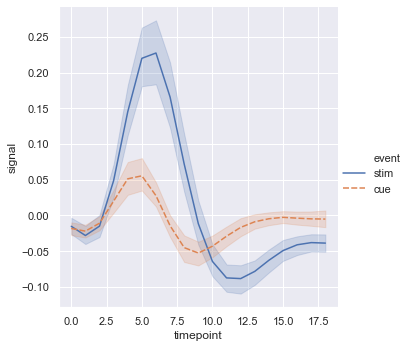

In [22]:
sns.relplot(x = "timepoint", y = "signal", hue = "event", 
           kind = "line", style = "event",
           data = fmri)
pass

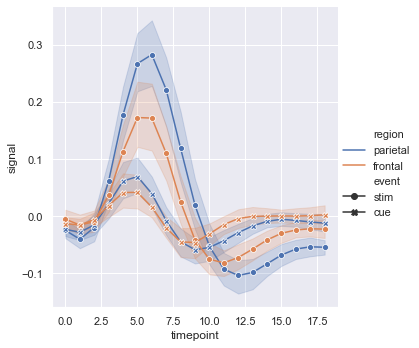

In [23]:
sns.relplot(x="timepoint", y="signal", hue="region", 
            style="event",
            dashes=False, 
            markers=True, 
            kind="line", data=fmri);

# Showing multiple relationships with faceting

* The best approach may be to make more than one plot. Because `relplot()` is based on the `FacetGrid`, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

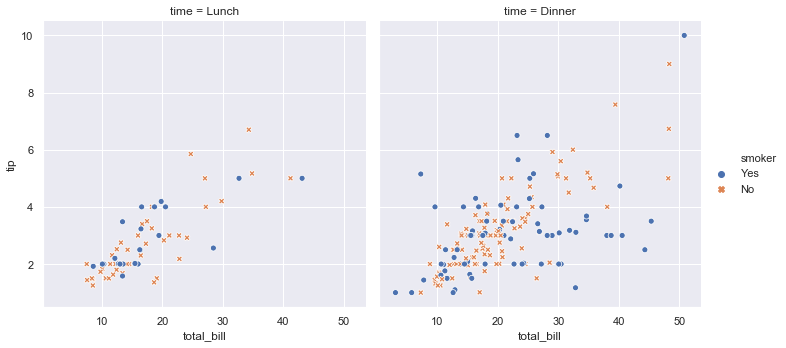

In [25]:
sns.relplot(x = "total_bill", y = "tip", hue = 'smoker', 
           col = 'time', data = tips, style = 'smoker');
pass

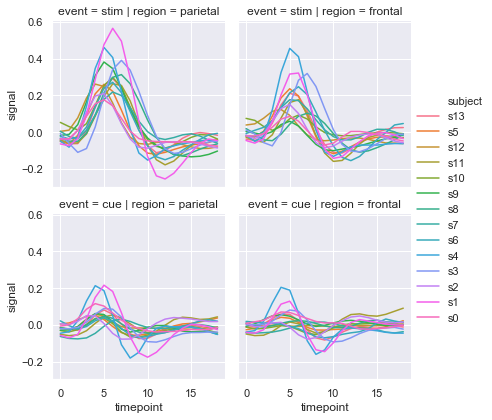

In [26]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

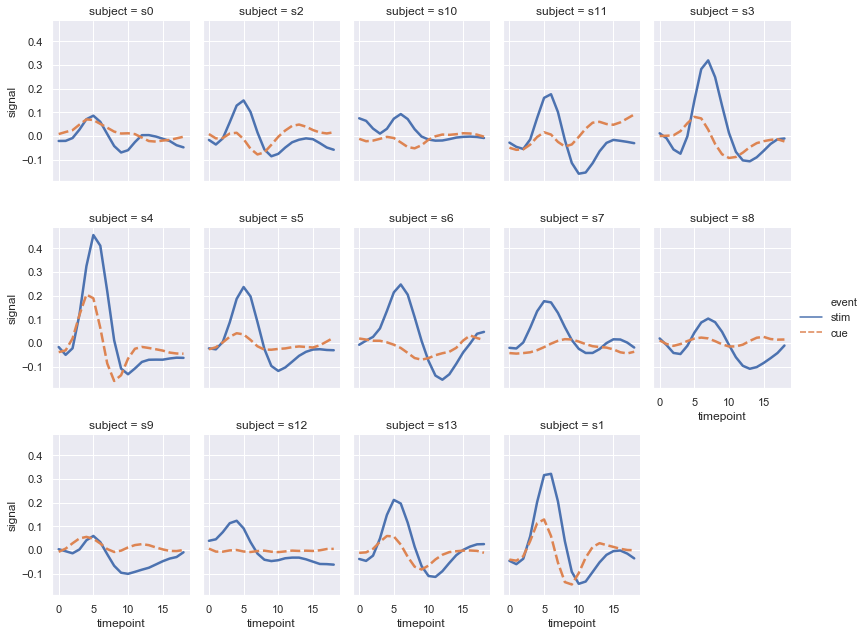

In [27]:
sns.relplot(x="timepoint", y="signal", hue="event", 
            style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", 
            data=fmri.query("region == 'frontal'"));